# ETUDE EXPLORATOIRE DES DONNEES DES SITES DE  PIRATAGE DE FILM

_

_

## ANALYSE DES DONNEES

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
data=pd.read_csv("movies_dataset.csv")
data

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,20543,NaN,NaN,NaN,"1,998",28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,NaN,NaN,Bhai-Bahen,"6,219",NaN
20544,20544,7.7,NaN,Bimal Roy,"6,080",28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,"16,376","Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,20545,8.0,NaN,NaN,"3,276",30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,"7,220",NaN
20546,20546,NaN,NaN,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,"1,419",NaN


In [5]:
data.shape

(20548, 15)

#### Suppression de la colonne 'Unnamed: 0' qui n'est d'aucune utilité pour cette étude.

In [6]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

#### Nouvelle data

In [7]:
data

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,NaN,NaN,NaN,"1,998",28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,NaN,NaN,Bhai-Bahen,"6,219",NaN
20544,7.7,NaN,Bimal Roy,"6,080",28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,"16,376","Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,8.0,NaN,NaN,"3,276",30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,"7,220",NaN
20546,NaN,NaN,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,"1,419",NaN


#### Vérification des valeurs manquantes et abérantes

In [8]:
data.isna().sum()

IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64

In [9]:
data.duplicated().sum()

0

#### Aucune donnée dupliquée.

In [10]:
data.isna().sum().sum()

18464

In [11]:
data.shape

(20548, 14)

In [12]:
20548-18464

2084

### Presque tous nos données sont nan

<AxesSubplot:>

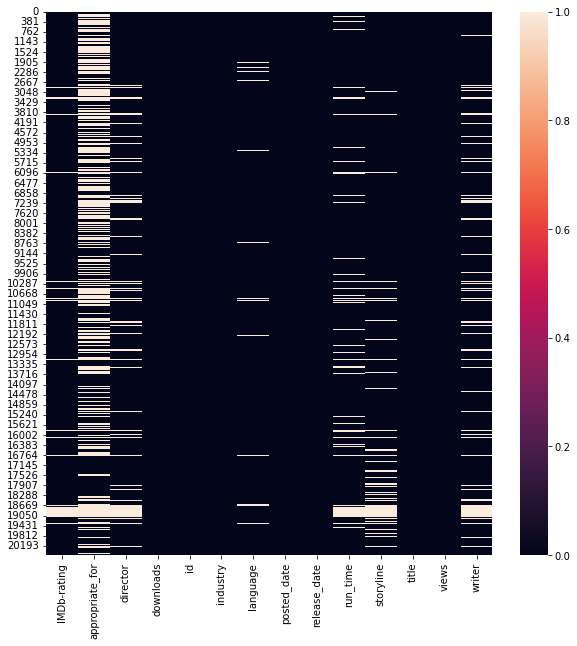

In [13]:
plt.figure(figsize = (10,10))

sns.heatmap(data.isna())

#### Nous allons donc supprimer toutes les colonnes qui ont des valeurs manquantes>70% des données

In [14]:
column_with_nan = data.columns[data.isnull().any()]
data.shape

(20548, 14)

In [15]:
for column in column_with_nan:(column, data[column].isnull().sum())

In [16]:
for column in column_with_nan:
    if data[column].isnull().sum()*100.0/data.shape[1] > 70.0:
        data.drop(column,1, inplace=True)

C:\Users\sance\AppData\Local\Temp/ipykernel_28640/2941149517.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(column,1, inplace=True)


In [17]:
data.shape

(20548, 7)

In [18]:
data.isna().sum().sum()

6

In [19]:
6/(20548*7)*100

0.004171417447648711

#### Nous avons environ 0% de données manquantes

### Nouvelle Df après la suppression des colonnes irrécupérables 

In [20]:
data

,downloads,id,industry,posted_date,release_date,title,views
0,304,372092,Hollywood / English,"20 Feb, 2023",Jan 28 2023,Little Dixie,"2,794"
1,73,372091,Hollywood / English,"20 Feb, 2023",Feb 05 2023,Grilling Season: A Curious Caterer Mystery,"1,002"
2,"1,427",343381,Hollywood / English,"20 Apr, 2021",Jun 18 2021,In the Earth,"14,419"
3,"1,549",372090,Tollywood,"20 Feb, 2023",Feb 17 2023,Vaathi,"4,878"
4,657,372089,Tollywood,"20 Feb, 2023",Jan 26 2023,Alone,"2,438"
...,...,...,...,...,...,...,...
20543,"1,998",28957,Bollywood / Indian,"01 Jan, 1970",Mar 13 1959,Bhai-Bahen,"6,219"
20544,"6,080",28958,Bollywood / Indian,"01 Jan, 1970",May 13 1955,Devdas,"16,376"
20545,"3,276",30459,Bollywood / Indian,"01 Jan, 1970",Mar 28 1958,Madhumati,"7,220"
20546,309,371669,Wrestling,"10 Feb, 2023",Feb 09 2023,TNA.Impact 2023-02-09,"1,419"


### Changement de types

In [23]:
data.dtypes

downloads       object
id               int64
industry        object
posted_date     object
release_date    object
title           object
views           object
dtype: object

In [28]:
# Mettre views and dowloads en numeric.
for col in 'downloads', 'views':
    data[col] = data[col].str.replace(',','')
    data[col] = data[col].astype('float')

In [34]:
# Mettre id en strings.
data['id'] = data['id'].astype(str)


In [32]:
# Mettre posted_date en datetime.
data['posted_date'] = pd.to_datetime(data['posted_date'])

In [46]:
data['release_date'] = pd.to_datetime(data['release_date'])

In [47]:
data.dtypes

downloads              float64
id                      object
industry                object
posted_date     datetime64[ns]
release_date    datetime64[ns]
title                   object
views                  float64
dtype: object

### Après le nettoyage des données, nous allons effectuer des déductions.

##  Quelle industrie est la plus touchée par le piratage ?

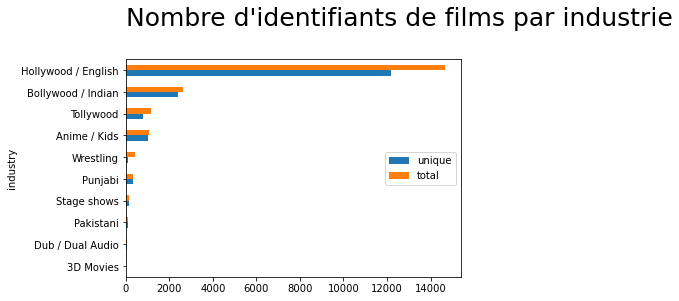

In [37]:
(data.groupby('industry').agg(unique=('id', 'nunique'),total=('id', 'count')).sort_values(by='total', ascending=True).plot(kind='barh'))

plt.legend(loc='right')
plt.title("Nombre d'identifiants de films par industrie\n", fontsize=25, loc='left')
plt.show()

### Malgré que le nombre d'id ne sont pas uniques, fort est de constater que l'industrie la plus touchée par le piratage est sans doute Hollywood/ English avec plus de 14000 ids au total et environ 12000 ids uniques.

_

_

## Quel film a le plus de vues et de téléchargements piratés ?

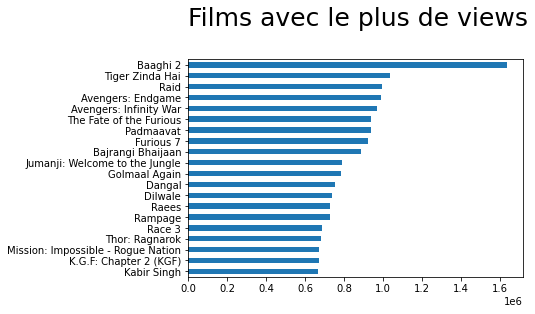

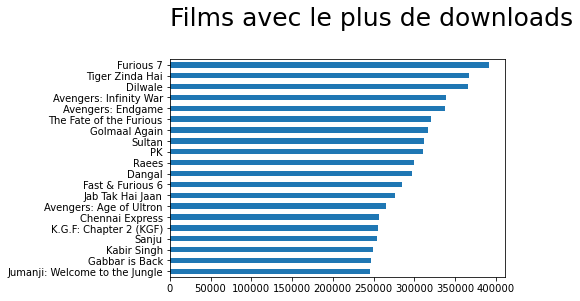

In [40]:
for col in 'views', 'downloads':
    (
        data[['title', col]]
        .sort_values(by=col, ascending=False)
        .head(20)
        .sort_values(by=col, ascending=True)
        .plot( kind='barh',
              y=col,
              x='title',
             legend=False)
    )
    plt.ylabel('')
    plt.title(f'Films avec le plus de {col}\n', fontsize=25, loc='left')
    plt.show()
    print('\n')

### Le film avec le plus de vues est Baaghi 2 et le plus téléchargé est Furious 7

_

_

In [60]:
data["title"].value_counts()

The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
                                                ... 
Kesari                                             1
Old Boys                                           1
American Exit                                      1
Adventures of Aladdin                              1
Madhumati                                          1
Name: title, Length: 16572, dtype: int64

___

____

_

_

### Je suis disposé à toute critique ou suggestion dans le but d'améliorer mon travail 
### Veuillez me contacter à cette adresse si vous avez d'autres notions à apporter sancesanogo@gmail.com